# Model Evaluation

In [36]:
# Import the Titanic data
import pandas as pd
titanic = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [37]:
# import the sklearn.cross_validation library
import sklearn.cross_validation

In [38]:
# Split the data into training and testing sets using train_test_split
split_data = sklearn.cross_validation.train_test_split(X,y)
type(split_data)
split_data[2]

PassengerId
217    1
141    0
185    1
313    0
453    0
762    0
376    1
559    1
508    1
416    0
815    0
519    1
503    0
875    1
490    1
23     1
300    1
702    1
299    1
215    0
713    1
861    0
784    0
844    0
691    1
362    0
600    1
537    0
870    1
786    0
      ..
603    0
594    0
511    1
218    0
484    1
9      1
750    0
501    0
690    1
161    0
675    0
707    1
50     0
833    0
200    0
212    1
481    0
329    1
570    1
636    1
827    0
635    0
19     0
504    0
814    0
132    0
625    0
286    0
420    0
522    0
Name: Survived, dtype: int64

In [39]:
# Train your favourite predictor on the training data
(X_train, X_test, y_train, y_test) = split_data
import sklearn.tree
decisiontree_classifier = sklearn.tree.DecisionTreeClassifier(criterion='gini')
decisiontree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

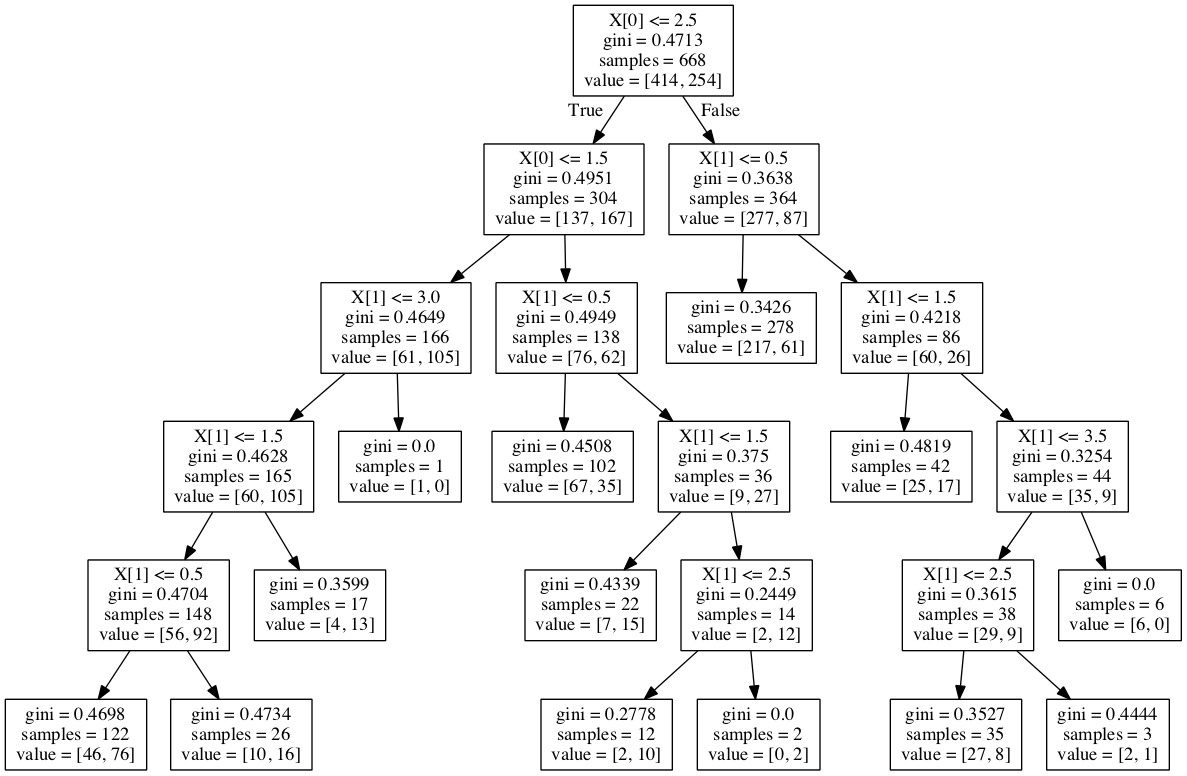

In [40]:
import StringIO
import sklearn.tree
import IPython.display
import pydot

File_obj = StringIO.StringIO()
sklearn.tree.export_graphviz(decisiontree_classifier, out_file=File_obj)
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [41]:
# Use this model to predict the test data
y_predicitions = decisiontree_classifier.predict(X_test)
y_predicitions

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
# How accurate was your model on this test data? 
import sklearn.metrics
sklearn.metrics.accuracy_score(y_test, y_predicitions)

0.70403587443946192

### Null accuracy

Null accuracy is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [43]:
# import the sklearn.dummy library
from sklearn.dummy import DummyClassifier
dummy_classifier = sklearn.dummy.DummyClassifier(strategy='most_frequent')

In [44]:
# How accurate is the DummyClassifier on your data?
# (Hopefully it was better than your favourite predictor)
dummy_classifier.fit(X_train, y_train)
dummy_predictions = dummy_classifier.predict(X_test)
sklearn.metrics.accuracy_score(y_test, dummy_predictions)
#y_train.describe()

0.60538116591928248

## K-fold

In [45]:
# Use sklearn.cross_validation.cross_val_score to test your classifier
# 10 times on different partitions
sklearn.cross_validation.cross_val_score(decisiontree_classifier, X, y, cv=10, scoring='accuracy')

array([ 0.62222222,  0.62222222,  0.73033708,  0.6741573 ,  0.73033708,
        0.68539326,  0.76404494,  0.74157303,  0.76404494,  0.77272727])